In [1]:
import os
import rasterio 
from glob import glob
from tqdm import tqdm
import pandas as pd
import numpy as np

from dataset.planet_segmentation import PlanetSegmentation
import torch
from loguru import logger

import matplotlib.pyplot as plt

In [ ]:
# all_tiles = None
# for csv_fp in tqdm(glob(os.path.join("tiled_planet", "*.csv"))):
#     tmp = pd.read_csv(csv_fp)
#     if all_tiles is None:
#         all_tiles = tmp
#     else:
#         all_tiles = pd.concat([all_tiles, tmp])
# all_tiles.to_csv("all_tiles_planet.csv", index=False)
# print(all_tiles.shape)

100%|██████████| 123/123 [00:03<00:00, 32.63it/s]


(332536, 11)


In [3]:
all_tiles = pd.read_csv("all_tiles_planet.csv")
all_tiles.shape

(332536, 11)

In [5]:
all_tiles["planet_fp"].value_counts()

planet_fp
/project/pi_cjgleason_umass_edu/swot_planet/unit/81210100041.0/23810af8-d590-44e5-8d82-401a7170e44f/PSScene/20240901_213842_84_24b5_3B_AnalyticMS_SR_clip.tif    130
/project/pi_cjgleason_umass_edu/swot_planet/unit/81210100041.0/23810af8-d590-44e5-8d82-401a7170e44f/PSScene/20240509_213210_58_24c0_3B_AnalyticMS_SR_clip.tif    130
/project/pi_cjgleason_umass_edu/swot_planet/unit/81210100041.0/23810af8-d590-44e5-8d82-401a7170e44f/PSScene/20240701_222311_43_24e1_3B_AnalyticMS_SR_clip.tif    130
/project/pi_cjgleason_umass_edu/swot_planet/unit/81210100041.0/23810af8-d590-44e5-8d82-401a7170e44f/PSScene/20240609_213452_18_24c2_3B_AnalyticMS_SR_clip.tif    130
/project/pi_cjgleason_umass_edu/swot_planet/unit/81210100041.0/23810af8-d590-44e5-8d82-401a7170e44f/PSScene/20240519_222833_25_24dd_3B_AnalyticMS_SR_clip.tif    130
                                                                                                                                                                ... 


In [ ]:
ckpt_dir = "/work/pi_smaji_umass_edu/rdaroya/planet-benchmark/results/planet-water-best-perf"
ckpt_name = "20250411-100516--fpn--linear--resnet50--no_head--mtl_baselines_vanilla_uniform_model_best"
optim_thresh = 0.3
ckpt_path = os.path.join(ckpt_dir, ckpt_name+".pth.tar")
assert os.path.exists(ckpt_path)

In [15]:
fp = "/scratch3/workspace/rdaroya_umass_edu-water/river-width-planet-global/tiled_planet/81210100041.0--23810af8-d590-44e5-8d82-401a7170e44f--PSScene--20240408_213204_63_24c0_3B_AnalyticMS_SR_clip/tile_0_500-0-500.tif"

In [18]:

checkpoint = torch.load(ckpt_path, weights_only=False)
# ckpt_lr = ckpt_path.split("lr")[-1].split("/")[0]
# ckpt_lr = float(ckpt_lr)
ckpt_fn = ckpt_path.split("/")[-1].replace(".pth.tar", "")
logger.debug(f"ckpt_fn: {ckpt_fn}")
ckpt_opt = checkpoint["opt"]

2025-05-20 13:55:13.398 | DEBUG    | __main__:<module>:5 - ckpt_fn: 20250411-100516--fpn--linear--resnet50--no_head--mtl_baselines_vanilla_uniform_model_best


In [21]:
test_dataset1 = PlanetSegmentation(resize_size=ckpt_opt.resize_size, return_fp=True, is_downsample=False)
logger.debug(f"Using batch size 1 for test loader")
test_sampler = None
test_loader = torch.utils.data.DataLoader(
    test_dataset1, batch_size=1, shuffle=False,
    num_workers=1, pin_memory=True, sampler=test_sampler, drop_last=False)
test_batch = len(test_loader)
test_dataset = iter(test_loader)

2025-05-20 13:55:25.653 | DEBUG    | dataset.planet_segmentation:__init__:77 - self.is_downsample: False
2025-05-20 13:55:25.655 | DEBUG    | __main__:<module>:2 - Using batch size 1 for test loader


In [22]:

with torch.no_grad():
    for k in tqdm(range(test_batch)):
        test_data, test_labels, input_fp = next(test_dataset)
        break

  0%|          | 0/305970 [00:00<?, ?it/s]


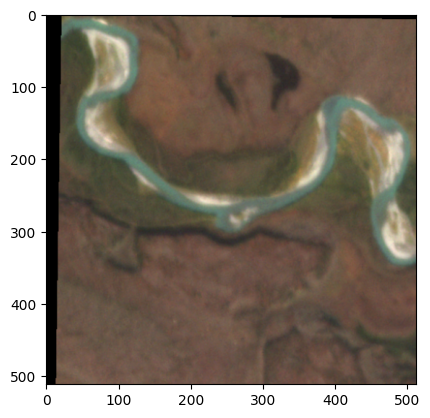

In [34]:
tmp = test_data[0][:3, :, :]
tmp = np.transpose(tmp, (1,2,0)).detach().numpy()[:,:,::-1]
rgb = (tmp-np.min(tmp))/(np.max(tmp)-np.min(tmp))
plt.imshow(rgb)

In [37]:
folder_name = input_fp[0].split("/")[-2]
out_name = input_fp[0].split("/")[-1]
out_name

'tile_0_500-0-500.tif'